In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
du = xr.open_zarr(store=store, consolidated=True)
du = du.rename({'depthu' : 'depth'})
du 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [3]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-v.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
dv = xr.open_zarr(store=store, consolidated=True)
dv = dv.rename({'depthv' : 'depth'})
dv

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sometauy              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    vomecrty              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    vtau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vtau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean V grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:49 CEST
    title:             ocean V grid variables

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [5]:
ds = open_s3fs('PC-data')

In [6]:
u = du.vozocrtx.isel(y=slice(900,1800), x=slice(200,1400))
v = dv.vomecrty.isel(y=slice(900,1800), x=slice(200,1400))
mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))

# Ser på U data alene

Da har jeg 73 variabler. 
Om jeg er på U og V har jeg 2*73=146 variabler

### Loopet over hele området 

Dette skal per def funke, men stort dataset og lite minne er det ikke sikkert det går.. 

### Note til meg selv: 
Hva ønsker jeg å finne?
- PC1 i verticalen for alle punkter i griddsystemet? Eller flere PCX også?
- Bare eigenvalues siden vi ikke trenger retningen? 


# Tester for et punkt først: 

Trenger å finne ut hvor langt ned i dypet punktet har verdier

In [10]:
x_p = 500
y_p = 500
d = mbathy.isel(x=x_p, y=y_p).values

In [21]:
dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1))
m = math.floor(dyp.depth.max())
m

2955

In [22]:
l = math.floor(m/5)
l

591

In [26]:
d-1

60

In [27]:
s = dyp.depth.sum()
s

<xarray.DataArray 'depth' ()>
array(36276.215, dtype=float32)
Coordinates:
    nav_lat  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon  float32 dask.array<chunksize=(), meta=np.ndarray>

In [31]:
m/60

49.25

In [ ]:
dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1,l)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter

cov_p = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(cov_p.shape) 
print(cov_p)
print('------------------------------------------------------')    
print(values[0]) 
print('------------------------------------------------------')    
print(values[1])
print('------------------------------------------------------')    
print(vectors[0])    

In [111]:
x_p = 500
y_p = 500 

'Finding the level the given location dosent have values for anymore'

mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
d = mbathy.isel(x=x_p, y=y_p).values

l = int(math.floor((d-1)/5))

dyp = u.isel(x=x_p, y=y_p, depth = slice(0,d-1,l)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter

cov_p = np.cov(dyp.T, bias=True) # uten .T ble den en 73x73 matrise 
values, vectors = np.linalg.eig(cov_p)
order = values.argsort()[::-1]
values, vectors = values[order], vectors[:, order]

print(cov_p.shape) 
print(cov_p)
print('------------------------------------------------------')    
print(values[0]) 
print('------------------------------------------------------')    
print(values[1])
print('------------------------------------------------------')    
print(vectors[0])    

(5, 5)
[[ 1.37183093e-04  6.75486821e-06  3.86603563e-07 -3.88472546e-07
   7.44950258e-07]
 [ 6.75486821e-06  1.36612051e-05  8.41053338e-06  1.07578113e-07
   2.44311893e-07]
 [ 3.86603563e-07  8.41053338e-06  4.01581541e-05  2.52119190e-06
   1.89736675e-06]
 [-3.88472546e-07  1.07578113e-07  2.52119190e-06  9.53107667e-07
   6.78222578e-07]
 [ 7.44950258e-07  2.44311893e-07  1.89736675e-06  6.78222578e-07
   7.38140805e-07]]
------------------------------------------------------
0.00013756404762989486
------------------------------------------------------
4.27813927350741e-05
------------------------------------------------------
[-0.99842668 -0.02351423 -0.05049987 -0.00338128  0.00543898]


In [18]:
def dyp(depth): 
    depth = int(depth)
    dyp = np.zeros(depth, dtype=int)
    #d = du.depth.isel(depth=depth).values
    for i in range(len(dyp)):
        d = du.depth[i].values #gdepth_1d
        dyp[i] = d
    return dyp  

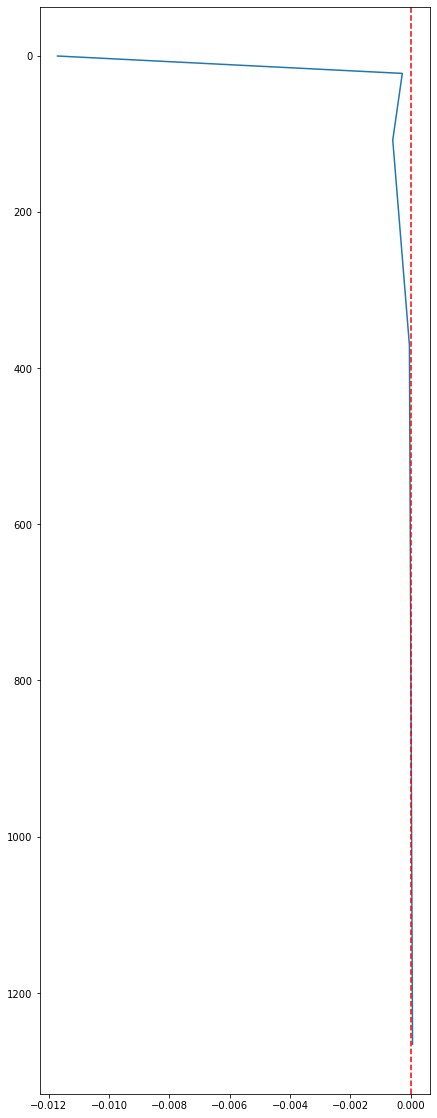

In [113]:
fig, ax = plt.subplots(1,1,figsize = (7,20))

ax.plot(vectors[0]*np.sqrt(values[0]), dyp.depth)
ax.axvline(0, color='r', linestyle = '--')
ax.invert_yaxis()

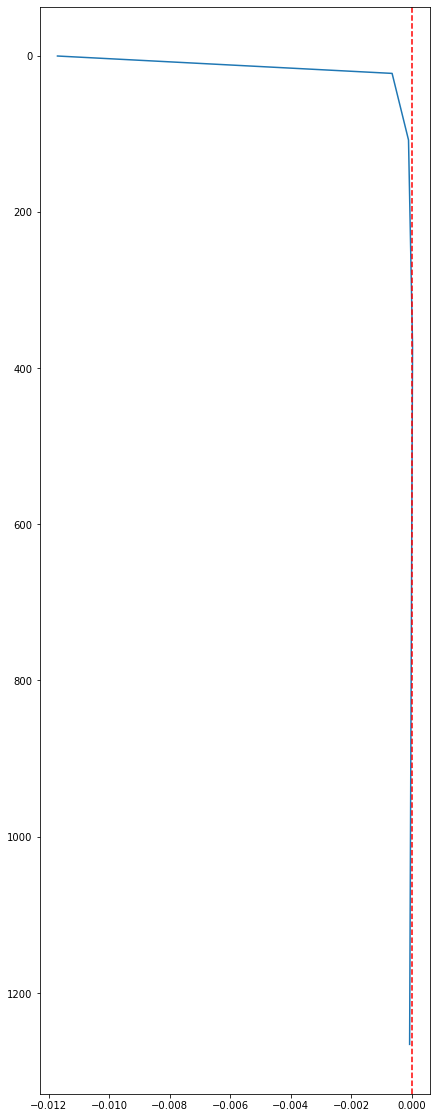

In [114]:
fig, ax = plt.subplots(1,1,figsize = (7,20))

ax.plot(vectors.T[0]*np.sqrt(values[0]), dyp.depth)
ax.axvline(0, color='r', linestyle = '--')
ax.invert_yaxis()

nytt punkt 

In [99]:
x_p2 = 660
y_p2 = 790 

'Finding the level the given location dosent have values for anymore'

mbathy = ds.mbathy.isel(y=slice(900,1800), x=slice(200,1400))
d2 = mbathy.isel(x=x_p2, y=y_p2).values

l = int(round((d2-1)/5,0))

dyp2 = u.isel(x=x_p2, y=y_p2, depth = slice(0,d2-1,l)) # -1 pga d=0 og vi vil en opp der vi har bunnhastigheter
print(dyp2.shape)

cov_p2 = np.cov(dyp2.T, bias=True) # uten .T ble den en 73x73 matrise 
values2, vectors2 = np.linalg.eig(cov_p2)
order2 = values2.argsort()[::-1]
values2, vectors2 = values2[order2], vectors2[:, order2]

print(cov_p2.shape) 
print(cov_p2)
print('------------------------------------------------------')    
print(values2[0]) 
print('------------------------------------------------------')    
print(values2[1])
print('------------------------------------------------------')    
print(vectors2[0])    

(73, 6)
(6, 6)
[[0.00098953 0.00091895 0.00083446 0.00069937 0.00060277 0.00059835]
 [0.00091895 0.00086208 0.00078675 0.00066263 0.00056995 0.00056315]
 [0.00083446 0.00078675 0.00072354 0.00061583 0.00052525 0.00051656]
 [0.00069937 0.00066263 0.00061583 0.00054418 0.00046407 0.00045057]
 [0.00060277 0.00056995 0.00052525 0.00046407 0.00043941 0.00042871]
 [0.00059835 0.00056315 0.00051656 0.00045057 0.00042871 0.00045422]]
------------------------------------------------------
0.0038574951125671434
------------------------------------------------------
0.00010319097105089435
------------------------------------------------------
[-0.50058345 -0.36951918  0.43609279  0.23864687 -0.56374695  0.21893356]


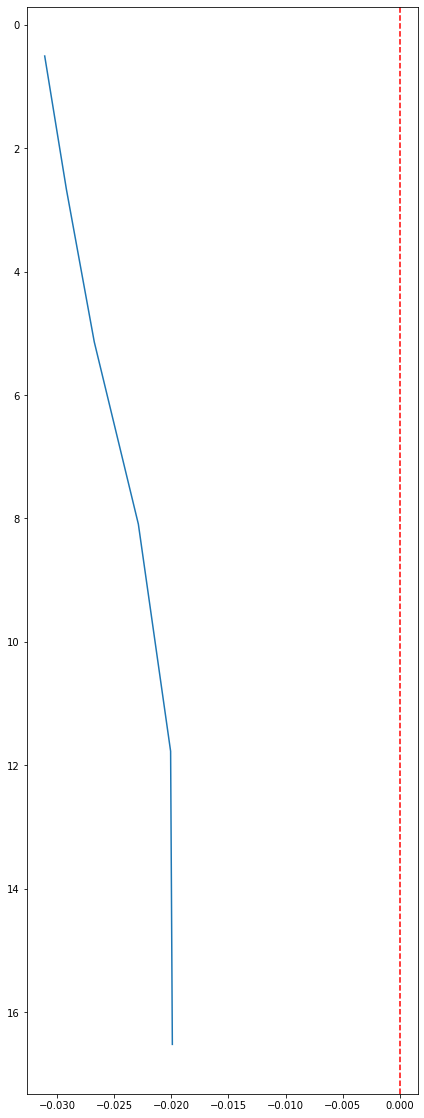

In [110]:
fig, ax = plt.subplots(1,1,figsize = (7,20))

ax.plot(vectors2.T[0]*np.sqrt(values2[0]),dyp2.depth)
ax.axvline(0, color='r', linestyle = '--')
ax.invert_yaxis()

In [109]:
dyp2.depth

<xarray.DataArray 'depth' (depth: 6)>
array([ 0.50576 ,  2.667682,  5.140361,  8.092519, 11.77368 , 16.525322],
      dtype=float32)
Coordinates:
  * depth    (depth) float32 0.5058 2.668 5.14 8.093 11.77 16.53
    nav_lat  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon  float32 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    axis:       Z
    bounds:     depthu_bounds
    long_name:  Vertical U levels
    positive:   down
    units:      m

In [53]:
dyp2

<xarray.DataArray 'vozocrtx' (time_counter: 73, depth: 12)>
dask.array<getitem, shape=(73, 12), dtype=float32, chunksize=(1, 12), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 13.99 16.53 19.43
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
Attributes:
    cell_methods:        time: mean (interval: 360 s)
    interval_operation:  360 s
    interval_write:      5 d
    long_name:           sea_water_x_velocity
    online_operation:    average
    standard_name:       sea_water_x_velocity
    units:               m/s

In [63]:
alla = dyp2.depth/5
alla

<xarray.DataArray 'depth' (depth: 12)>
array([0.101152  , 0.31117105, 0.5335363 , 0.77125597, 1.0280722 ,
       1.3086067 , 1.6185038 , 1.96455   , 2.3547359 , 2.7982078 ,
       3.3050644 , 3.8859603 ], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.5058 1.556 2.668 3.856 ... 13.99 16.53 19.43
    nav_lat  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon  float32 dask.array<chunksize=(), meta=np.ndarray>

In [98]:
l = (d2-1)/5
l

2.4

In [96]:
l = int(round((d2-1)/5,0))
l

2

In [90]:
dyp2 = u.isel(x=x_p2, y=y_p2, depth = slice(0,d2-1))

In [91]:
dyp2.depth

<xarray.DataArray 'depth' (depth: 4)>
array([ 0.50576 ,  3.85628 ,  8.092519, 13.991038], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.5058 3.856 8.093 13.99
    nav_lat  float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon  float32 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    axis:       Z
    bounds:     depthu_bounds
    long_name:  Vertical U levels
    positive:   down
    units:      m

In [84]:
63/5

12.6

In [ ]:
def hardcoding(liste):
    len_of_list = len(liste)
    for i in range(len(len_of_list)):
        